In [19]:
import numpy as np
import pandas as pd

In [20]:
train =  pd.read_csv("../trainFullNumberNew88.csv",encoding = "utf-8",header = None)
validata =  pd.read_csv("../validataFullNumberNew88.csv",encoding = "utf-8",header = None)
print(train.head())
print(".............")
l = 56  #54 维
trainx = train.iloc[:,1:l]
trainy = train.iloc[:,0]

validatax = validata.iloc[:,1:l]
validatay = validata.iloc[:,0]
trainx,validatax
#(array([0.18, 0.11, 0.18, 0.15, 0.03, 0.11, 0.08, 0.09, 0.01, 0.06]),

   0         1    2    3    4    5    6    7      8      9   ...   239  240  \
0    1  0.970149    0    1    0    0    0 -666 -888.0 -888.0 ...   NaN  NaN   
1    1  0.970149    1    1    1    0    0 -888 -888.0 -888.0 ...   NaN  NaN   
2    2  0.835821    2    1    2    0    0 -888 -888.0 -888.0 ...   NaN  NaN   
3    2  0.119403    3    1    3    0    0 -666 -666.0 -666.0 ...   NaN  NaN   
4    2  0.119403    4    1    0    0    1 -666 -666.0    9.0 ...   NaN  NaN   

   241  242  243  244  245  246  247  248  
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 249 columns]
.............


(             1    2   3   4   5   6    7      8      9      10  ...       46  \
 0      0.970149    0   1   0   0   0 -666 -888.0 -888.0 -888.0  ...   -888.0   
 1      0.970149    1   1   1   0   0 -888 -888.0 -888.0 -888.0  ...   -888.0   
 2      0.835821    2   1   2   0   0 -888 -888.0 -888.0 -888.0  ...   -888.0   
 3      0.119403    3   1   3   0   0 -666 -666.0 -666.0 -666.0  ...   -666.0   
 4      0.119403    4   1   0   0   1 -666 -666.0    9.0    9.0  ...      9.0   
 5      0.268657    5   1   0   0   0 -888    8.0    8.0    8.0  ...      8.0   
 6      0.268657    6   1   0   0   0 -888    8.0    8.0    8.0  ...      8.0   
 7      0.268657    7   1   0   0   0 -888    8.0    8.0    8.0  ...      8.0   
 8      0.268657    8   1   0   0   0 -888    8.0    8.0    8.0  ...      8.0   
 9      0.268657    9   1   0   0   1 -888    8.0    8.0    8.0  ...      8.0   
 10     0.268657   10   1   0   0   0 -888    8.0    8.0    8.0  ...      8.0   
 11     0.268657   11   1   

In [21]:
# trainx.isnull().sum(),validatax.isnull().sum().sort_values(ascending = False)[0:3]

In [22]:
trainx.fillna(-888,inplace = True)
validatax.fillna(-888,inplace = True)
trainx.isnull().sum(),validatax.isnull().sum()

(1     0
 2     0
 3     0
 4     0
 5     0
 6     0
 7     0
 8     0
 9     0
 10    0
 11    0
 12    0
 13    0
 14    0
 15    0
 16    0
 17    0
 18    0
 19    0
 20    0
 21    0
 22    0
 23    0
 24    0
 25    0
 26    0
 27    0
 28    0
 29    0
 30    0
 31    0
 32    0
 33    0
 34    0
 35    0
 36    0
 37    0
 38    0
 39    0
 40    0
 41    0
 42    0
 43    0
 44    0
 45    0
 46    0
 47    0
 48    0
 49    0
 50    0
 51    0
 52    0
 53    0
 54    0
 55    0
 dtype: int64, 1     0
 2     0
 3     0
 4     0
 5     0
 6     0
 7     0
 8     0
 9     0
 10    0
 11    0
 12    0
 13    0
 14    0
 15    0
 16    0
 17    0
 18    0
 19    0
 20    0
 21    0
 22    0
 23    0
 24    0
 25    0
 26    0
 27    0
 28    0
 29    0
 30    0
 31    0
 32    0
 33    0
 34    0
 35    0
 36    0
 37    0
 38    0
 39    0
 40    0
 41    0
 42    0
 43    0
 44    0
 45    0
 46    0
 47    0
 48    0
 49    0
 50    0
 51    0
 52    0
 53    0
 54    0
 55  

In [23]:
trainx[trainx == -888] = 3
trainx[trainx == -666] = 4
trainx[trainx == 8] = 5

validatax[validatax == -888] = 3
validatax[validatax == -666] = 4
validatax[validatax == 8] = 5
trainx.shape,validatax.shape

((56710, 55), (19464, 55))

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

rf0 = RandomForestClassifier(oob_score=True, random_state=10)
accuracyMean = 0
for i in range(1,6):
    x_train,x_test,y_train,y_test = train_test_split(trainx,trainy,test_size = 0.3,random_state=i)
    rf0.fit(x_train,y_train)
    pre = rf0.predict(x_test)
    mm = accuracy_score(pre,y_test)
    print(mm) 
    accuracyMean = mm
    label = train.columns
    importances = rf0.feature_importances_
importances
#  没有替换为3，4，5  得分  0.9927114559454535   替换后：0.9927114559454535  加特征之前
# 0.9965320637159819  加特征以后

d:\gongju\python3.6 64\anzhuang\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
d:\gongju\python3.6 64\anzhuang\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


0.9991183212837242


d:\gongju\python3.6 64\anzhuang\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
d:\gongju\python3.6 64\anzhuang\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


0.9987656497972139


d:\gongju\python3.6 64\anzhuang\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
d:\gongju\python3.6 64\anzhuang\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


0.9985893140539588


d:\gongju\python3.6 64\anzhuang\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
d:\gongju\python3.6 64\anzhuang\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


0.9987068712161289
0.9985305354728737


d:\gongju\python3.6 64\anzhuang\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
d:\gongju\python3.6 64\anzhuang\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


array([3.64e-02, 1.44e-01, 4.93e-02, 8.59e-02, 1.22e-03, 3.95e-04,
       3.13e-02, 1.11e-01, 4.55e-02, 9.48e-03, 2.57e-02, 9.53e-02,
       8.21e-02, 8.57e-03, 7.19e-03, 6.90e-03, 1.04e-02, 1.14e-02,
       9.92e-03, 2.99e-02, 3.53e-02, 7.47e-03, 4.67e-02, 1.33e-02,
       1.66e-03, 3.64e-03, 2.56e-03, 2.55e-03, 3.50e-03, 5.39e-03,
       1.73e-03, 1.20e-02, 9.34e-04, 4.72e-03, 2.49e-03, 4.66e-04,
       2.96e-03, 6.64e-03, 2.79e-03, 2.52e-03, 7.41e-03, 7.25e-04,
       2.40e-03, 1.58e-03, 2.20e-04, 3.29e-04, 1.44e-03, 4.03e-04,
       9.71e-04, 9.87e-04, 4.23e-03, 1.45e-02, 1.80e-03, 1.46e-03,
       1.10e-04])

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score 
accMean = 0
f1Mean = 0
for i in range(1,6):
    x_train,x_test,y_train,y_test = train_test_split(trainx,trainy,test_size = 0.3,random_state=i+100)
    xgb1 = XGBClassifier(
            learning_rate =0.1,
            max_depth=5,
            min_child_weight=5,
            gamma=0.1,
            subsample=0.8,
            colsample_bytree=0.8,
            nthread=3,
            scale_pos_weight=1,
            StratifiedKFold = True,          #0.866124	0.008005	0.965337	0.002286
            seed=1)
    xgb1.fit(x_train,y_train)
    prexgb = xgb1.predict(x_test)
    aa = accuracy_score(prexgb,y_test)
    print("acc",i,aa) 
    cc = f1_score (prexgb,y_test, average='micro')
    print("None",f1_score (prexgb,y_test, average=None))
    print("f1",i,cc)
    accMean += aa
    f1Mean += cc
print("accMean:",accMean/5,"f1Mean:",f1Mean/5)

# 加特征之前
# 没有替换1，2，3，4 得分 (0.9930772780883032, array([0.63, 0.89, 1.  , 0.97]))
#替换后：(0.9930772780883032, array([0.63, 0.89, 1.  , 0.97]))   说明替换与否不影响
# 加特征后
#(0.9974360289215938, array([0.88328076, 0.94982079, 0.99929794, 0.99176578]))
'''
64维度 特征（i）
acc 5 0.997825192499853
f1 5 0.997825192499853
accMean: 0.997883971080938 f1Mean: 0.997883971080938
64维度 特征（1）
acc 5 0.9978839710809381
f1 5 0.9978839710809381
accMean: 0.997860459648504 f1Mean: 0.997860459648504
加了字母比文字多的特征列
acc 5 0.997766413918768
f1 5 0.997766413918768
accMean: 0.9977781696349849 f1Mean: 0.9977781696349849
加了缺失率
acc 5 0.9980603068241932
f1 5 0.9980603068241932
accMean: 0.9982954211485335 f1Mean: 0.9982954211485335
最有参数和数据集
acc 5 0.9989419855404691
None [0.95 0.98 1.   0.99]
f1 5 0.9989419855404691
accMean: 0.9985540469053078 f1Mean: 0.9985540469053078

'''

d:\gongju\python3.6 64\anzhuang\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


acc 1 0.9985893140539588
None [0.96 0.97 1.   0.99]
f1 1 0.9985893140539588


d:\gongju\python3.6 64\anzhuang\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


acc 2 0.9982954211485334
None [0.93 0.97 1.   0.99]
f1 2 0.9982954211485334


d:\gongju\python3.6 64\anzhuang\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


acc 3 0.9983541997296185
None [0.93 0.97 1.   0.99]
f1 3 0.9983541997296185


d:\gongju\python3.6 64\anzhuang\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


acc 4 0.998824428378299
None [0.97 0.98 1.   0.99]
f1 4 0.998824428378299
acc 5 0.9990595427026392
None [0.96 0.98 1.   0.99]
f1 5 0.9990595427026392
accMean: 0.9986245812026098 f1Mean: 0.9986245812026098


d:\gongju\python3.6 64\anzhuang\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


'\n64维度 特征（i）\nacc 5 0.997825192499853\nf1 5 0.997825192499853\naccMean: 0.997883971080938 f1Mean: 0.997883971080938\n64维度 特征（1）\nacc 5 0.9978839710809381\nf1 5 0.9978839710809381\naccMean: 0.997860459648504 f1Mean: 0.997860459648504\n加了字母比文字多的特征列\nacc 5 0.997766413918768\nf1 5 0.997766413918768\naccMean: 0.9977781696349849 f1Mean: 0.9977781696349849\n加了缺失率\nacc 5 0.9980603068241932\nf1 5 0.9980603068241932\naccMean: 0.9982954211485335 f1Mean: 0.9982954211485335\n最有参数和数据集\nacc 5 0.9989419855404691\nNone [0.95 0.98 1.   0.99]\nf1 5 0.9989419855404691\naccMean: 0.9985540469053078 f1Mean: 0.9985540469053078\n\n'

In [38]:
xgb1 = XGBClassifier(
            learning_rate =0.1,
            n_estimators=100,
            max_depth=5,
            min_child_weight=5,
            gamma=0.1,
            subsample=0.8,
            colsample_bytree=0.8,
            nthread=3,
            scale_pos_weight=1,
            StratifiedKFold = True,         
            seed=1)
xgb1.fit(trainx,trainy)
print(trainx.shape,trainy.shape,validatax.shape,validatay.shape)
prexgb = xgb1.predict(validatax)
aa = accuracy_score(prexgb,validatay)
print("acc",aa) 
cc = f1_score (prexgb,validatay, average='macro')
print("f1",cc)
print(f1_score (prexgb,validatay, average=None))
''' 
不要第一列
acc 0.9966668375980718
f1 0.9966668375980718
array([0.89296636, 0.9540636 , 0.99891909, 0.97370807])
要第一列 (20行)
acc 0.9978975437157069
f1 0.9978975437157069
[0.91082803 0.9664903  0.99929783 0.99176578]
(64行)  i
acc 0.9985641761960925
f1 0.9985641761960925
[0.94 0.98 1.   1.  ]
（64行） 1
acc 0.9984616173529562
f1 0.9984616173529562
[0.93 0.98 1.   0.99]
加了字母比文字多行和缺失率行
acc 0.99892108508014
f1 0.998921085080148
[0.96 0.98 1.   1.  ]
缺失率加上，默认参数
acc 0.99922934648582
f1 0.99922934648582
[0.97 0.99 1.   1.  ]
最优
acc 0.99922934648582
f1 0.99922934648582
[0.97 0.99 1.   1.  ]
'''

(56710, 55) (56710,) (19464, 55) (19464,)
acc 0.9991779695848746
f1 0.9881463514295148
[0.97 0.99 1.   1.  ]


d:\gongju\python3.6 64\anzhuang\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


' \n不要第一列\nacc 0.9966668375980718\nf1 0.9966668375980718\narray([0.89296636, 0.9540636 , 0.99891909, 0.97370807])\n要第一列 (20行)\nacc 0.9978975437157069\nf1 0.9978975437157069\n[0.91082803 0.9664903  0.99929783 0.99176578]\n(64行)  i\nacc 0.9985641761960925\nf1 0.9985641761960925\n[0.94 0.98 1.   1.  ]\n（64行） 1\nacc 0.9984616173529562\nf1 0.9984616173529562\n[0.93 0.98 1.   0.99]\n加了字母比文字多行和缺失率行\nacc 0.99892108508014\nf1 0.998921085080148\n[0.96 0.98 1.   1.  ]\n缺失率加上，默认参数\nacc 0.99922934648582\nf1 0.99922934648582\n[0.97 0.99 1.   1.  ]\n最优\nacc 0.99922934648582\nf1 0.99922934648582\n[0.97 0.99 1.   1.  ]\n'

In [27]:
def plot_confusion_matrix(y_true, y_pred, labels):
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix
    cmap = plt.cm.binary
    cm = confusion_matrix(y_true, y_pred)
    tick_marks = np.array(range(len(labels))) + 0.5
    np.set_printoptions(precision=2)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10, 8), dpi=120)
    ind_array = np.arange(len(labels))
    x, y = np.meshgrid(ind_array, ind_array)
    intFlag = 0 # 标记在图片中对文字是整数型还是浮点型
    for x_val, y_val in zip(x.flatten(), y.flatten()):
        #

        if (intFlag):
            c = cm[y_val][x_val]
            plt.text(x_val, y_val, "%d" % (c,), color='red', fontsize=8, va='center', ha='center')

        else:
            c = cm_normalized[y_val][x_val]
            if (c > 0.0001):
                #这里是绘制数字，可以对数字大小和颜色进行修改
                plt.text(x_val, y_val, "%0.2f" % (c,), color='red', fontsize=7, va='center', ha='center')
            else:
                plt.text(x_val, y_val, "%d" % (0,), color='red', fontsize=7, va='center', ha='center')
    if(intFlag):
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
    else:
        plt.imshow(cm_normalized, interpolation='nearest', cmap=cmap)
    plt.gca().set_xticks(tick_marks, minor=True)
    plt.gca().set_yticks(tick_marks, minor=True)
    plt.gca().xaxis.set_ticks_position('none')
    plt.gca().yaxis.set_ticks_position('none')
    plt.grid(True, which='minor', linestyle='-')
    plt.gcf().subplots_adjust(bottom=0.15)
    plt.title('')
    plt.colorbar()
    xlocations = np.array(range(len(labels)))
    plt.xticks(xlocations, labels, rotation=90)
    plt.yticks(xlocations, labels)
    plt.ylabel('Index of True Classes')
    plt.xlabel('Index of Predict Classes')
#     plt.savefig('confusion_matrix.jpg', dpi=300)
    plt.show()

[[  144     2     0     0]
 [    2   282     0     0]
 [    5     4 18488     1]
 [    0     0     2   534]]


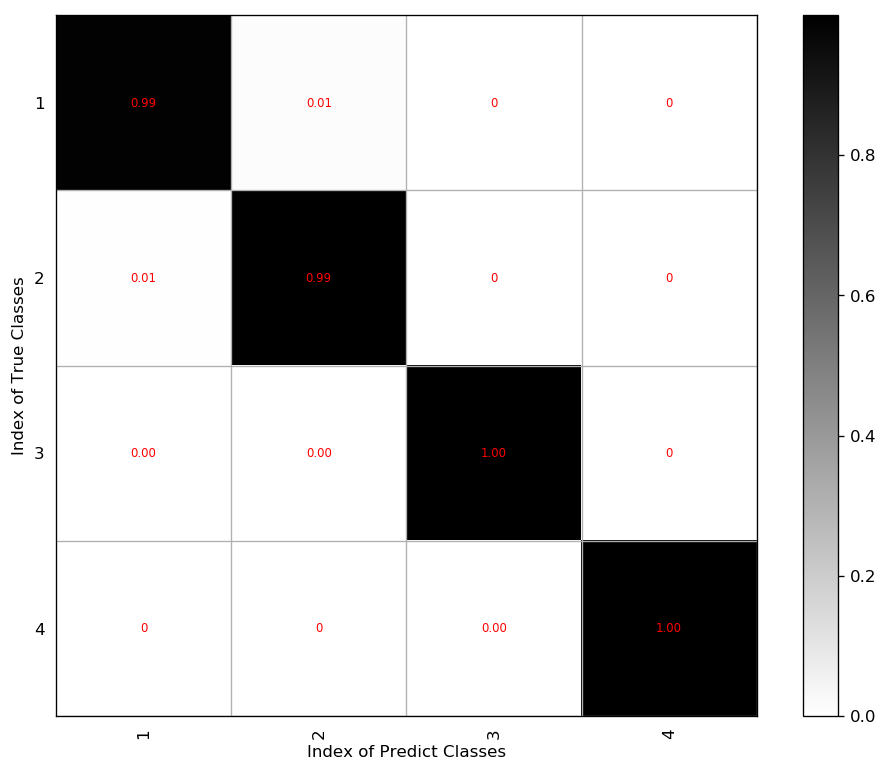

In [44]:
# my_confusion_matrix(pre,y_test)
from sklearn.metrics import confusion_matrix
labels = [1,2,3,4]
print(confusion_matrix(prexgb,validatay))
plot_confusion_matrix(prexgb,validatay,labels)

#20行  0.89，0.99，1，0.99
#64（i）0.93,0.99,1,0.99
#全部特征，未调优： 0.97，0.99，1，0.99  19464 个样本

In [33]:
#参数调优
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
import numpy as np
import pandas as pd
from scipy.stats import mode
import xgboost as xgb
from xgboost import XGBRegressor,XGBClassifier
from sklearn.metrics import mean_squared_error,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold,StratifiedKFold
from matplotlib import  pyplot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor


In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
scoring = ['precision_macro', 'recall_macro']
# scores = cross_val_score(xgb1, trainx, trainy, cv=3, scoring='f1_macro') 
scores = cross_validate(xgb1, trainx, trainy, scoring=scoring,cv=3, return_train_score=False)
scores 

d:\gongju\python3.6 64\anzhuang\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
d:\gongju\python3.6 64\anzhuang\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
d:\gongju\python3.6 64\anzhuang\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
d:\gongju\python3.6 64\anzhuang\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambig

{'fit_time': array([13.85, 14.79, 13.89]),
 'score_time': array([0.37, 0.51, 0.57]),
 'test_precision_macro': array([0.91, 0.94, 0.96]),
 'test_recall_macro': array([0.78, 0.92, 0.94])}

In [48]:
param_test1 = {
    'n_estimators':range(75,85,1),
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(
            learning_rate =0.1,
            n_estimators=100,
            max_depth=5,
            min_child_weight=5,
            gamma=0.1,
            subsample=0.8,
            colsample_bytree=0.8,
            nthread=3,
            scale_pos_weight=1,
            StratifiedKFold = True,         
            seed=1), 
                       param_grid = param_test1, scoring='f1_macro',n_jobs=3,iid=False, cv=3)
gsearch1.fit(trainx,trainy)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

d:\gongju\python3.6 64\anzhuang\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.89552, std: 0.05792, params: {'n_estimators': 75},
  mean: 0.89558, std: 0.05784, params: {'n_estimators': 76},
  mean: 0.89558, std: 0.05784, params: {'n_estimators': 77},
  mean: 0.89535, std: 0.05787, params: {'n_estimators': 78},
  mean: 0.89550, std: 0.05794, params: {'n_estimators': 79},
  mean: 0.89552, std: 0.05792, params: {'n_estimators': 80},
  mean: 0.89559, std: 0.05799, params: {'n_estimators': 81},
  mean: 0.89559, std: 0.05799, params: {'n_estimators': 82},
  mean: 0.89565, std: 0.05790, params: {'n_estimators': 83},
  mean: 0.89558, std: 0.05784, params: {'n_estimators': 84}],
 {'n_estimators': 83},
 0.8956543269445283)

In [53]:
param_test1 = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,8,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(
            learning_rate =0.1,
            n_estimators=83,
            max_depth=5,
            min_child_weight=5,
            gamma=0.1,
            subsample=0.8,
            colsample_bytree=0.8,
            nthread=3,
            scale_pos_weight=1,
            StratifiedKFold = True,         
            seed=1), 
                       param_grid = param_test1, scoring='f1_macro',n_jobs=3,iid=False, cv=3)
gsearch1.fit(trainx,trainy)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

d:\gongju\python3.6 64\anzhuang\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.83301, std: 0.06378, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.83835, std: 0.06034, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.84049, std: 0.05914, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.89696, std: 0.05471, params: {'max_depth': 3, 'min_child_weight': 7},
  mean: 0.83552, std: 0.06099, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.84667, std: 0.05545, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.89565, std: 0.05790, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.89700, std: 0.05513, params: {'max_depth': 5, 'min_child_weight': 7},
  mean: 0.85639, std: 0.05560, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: 0.84716, std: 0.05982, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.89665, std: 0.05746, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.89668, std: 0.05394, params: {'max_depth': 7, 'min_child_weight': 7},
  mean: 0.85760, std: 0.05465, params: {

In [54]:
param_test1 = {
    'max_depth':range(8,12,1),
    'min_child_weight':range(4,6,1)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(
            learning_rate =0.1,
            n_estimators=83,
            max_depth=5,
            min_child_weight=5,
            gamma=0.1,
            subsample=0.8,
            colsample_bytree=0.8,
            nthread=3,
            scale_pos_weight=1,
            StratifiedKFold = True,         
            seed=1), 
                       param_grid = param_test1, scoring='f1_macro',n_jobs=3,iid=False, cv=3)
gsearch1.fit(trainx,trainy)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

d:\gongju\python3.6 64\anzhuang\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.89836, std: 0.05832, params: {'max_depth': 8, 'min_child_weight': 4},
  mean: 0.89690, std: 0.05759, params: {'max_depth': 8, 'min_child_weight': 5},
  mean: 0.89844, std: 0.05836, params: {'max_depth': 9, 'min_child_weight': 4},
  mean: 0.89719, std: 0.05888, params: {'max_depth': 9, 'min_child_weight': 5},
  mean: 0.89819, std: 0.05822, params: {'max_depth': 10, 'min_child_weight': 4},
  mean: 0.89753, std: 0.05807, params: {'max_depth': 10, 'min_child_weight': 5},
  mean: 0.89819, std: 0.05822, params: {'max_depth': 11, 'min_child_weight': 4},
  mean: 0.89748, std: 0.05802, params: {'max_depth': 11, 'min_child_weight': 5}],
 {'max_depth': 9, 'min_child_weight': 4},
 0.8984413325504804)

In [55]:
param_test4 = {
    'learning_rate':[0.05,0.08,0.1]
}
gsearch4 = GridSearchCV(estimator =  XGBClassifier(
            learning_rate =0.1,
            n_estimators=83,
            max_depth=9,
            min_child_weight=4,
            gamma=0.1,
            subsample=0.8,
            colsample_bytree=0.8,
            nthread=3,
            scale_pos_weight=1,
            StratifiedKFold = True,         
            seed=1), 
                       param_grid = param_test4, scoring='f1_macro',n_jobs=3,iid=False, cv=3)
gsearch4.fit(trainx,trainy)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

d:\gongju\python3.6 64\anzhuang\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.88999, std: 0.06561, params: {'learning_rate': 0.05},
  mean: 0.89665, std: 0.06227, params: {'learning_rate': 0.08},
  mean: 0.89844, std: 0.05836, params: {'learning_rate': 0.1}],
 {'learning_rate': 0.1},
 0.8984413325504804)

In [56]:
param_test4 = {
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator =  XGBClassifier(
            learning_rate =0.1,
            n_estimators=83,
            max_depth=9,
            min_child_weight=4,
            gamma=0.1,
            subsample=0.8,
            colsample_bytree=0.8,
            nthread=3,
            scale_pos_weight=1,
            StratifiedKFold = True,         
            seed=1), 
                       param_grid = param_test4, scoring='f1_macro',n_jobs=3,iid=False, cv=3)
gsearch4.fit(trainx,trainy)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

d:\gongju\python3.6 64\anzhuang\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.90078, std: 0.04610, params: {'colsample_bytree': 0.6, 'subsample': 0.6},
  mean: 0.86134, std: 0.04196, params: {'colsample_bytree': 0.6, 'subsample': 0.7},
  mean: 0.86242, std: 0.04566, params: {'colsample_bytree': 0.6, 'subsample': 0.8},
  mean: 0.85990, std: 0.04951, params: {'colsample_bytree': 0.6, 'subsample': 0.9},
  mean: 0.90140, std: 0.04735, params: {'colsample_bytree': 0.7, 'subsample': 0.6},
  mean: 0.90075, std: 0.05067, params: {'colsample_bytree': 0.7, 'subsample': 0.7},
  mean: 0.90467, std: 0.04798, params: {'colsample_bytree': 0.7, 'subsample': 0.8},
  mean: 0.85248, std: 0.05601, params: {'colsample_bytree': 0.7, 'subsample': 0.9},
  mean: 0.89876, std: 0.05450, params: {'colsample_bytree': 0.8, 'subsample': 0.6},
  mean: 0.89660, std: 0.05705, params: {'colsample_bytree': 0.8, 'subsample': 0.7},
  mean: 0.89844, std: 0.05836, params: {'colsample_bytree': 0.8, 'subsample': 0.8},
  mean: 0.84540, std: 0.06115, params: {'colsample_bytree': 0.8, 'subsample'

In [58]:
param_test4 = {
    'subsample':[i/100.0 for i in range(65,80,5)],
    'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}
gsearch4 = GridSearchCV(estimator =  XGBClassifier(
            learning_rate =0.1,
            n_estimators=83,
            max_depth=9,
            min_child_weight=4,
            gamma=0.1,
            subsample=0.7,
            colsample_bytree=0.8,
            nthread=3,
            scale_pos_weight=1,
            StratifiedKFold = True,         
            seed=1), 
                       param_grid = param_test4, scoring='f1_macro',n_jobs=3,iid=False, cv=3)
gsearch4.fit(trainx,trainy)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

d:\gongju\python3.6 64\anzhuang\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.89790, std: 0.05416, params: {'colsample_bytree': 0.75, 'subsample': 0.65},
  mean: 0.89727, std: 0.05643, params: {'colsample_bytree': 0.75, 'subsample': 0.7},
  mean: 0.89859, std: 0.05781, params: {'colsample_bytree': 0.75, 'subsample': 0.75},
  mean: 0.89594, std: 0.05799, params: {'colsample_bytree': 0.8, 'subsample': 0.65},
  mean: 0.89660, std: 0.05705, params: {'colsample_bytree': 0.8, 'subsample': 0.7},
  mean: 0.89793, std: 0.05813, params: {'colsample_bytree': 0.8, 'subsample': 0.75},
  mean: 0.89489, std: 0.06096, params: {'colsample_bytree': 0.85, 'subsample': 0.65},
  mean: 0.89209, std: 0.05739, params: {'colsample_bytree': 0.85, 'subsample': 0.7},
  mean: 0.89607, std: 0.06214, params: {'colsample_bytree': 0.85, 'subsample': 0.75}],
 {'colsample_bytree': 0.75, 'subsample': 0.75},
 0.8985867614966246)

In [61]:
param_test4 = {
    'n_estimators':range(87,98,1)
}
gsearch4 = GridSearchCV(estimator =  XGBClassifier(
            learning_rate =0.1,
            n_estimators=89,
            max_depth=9,
            min_child_weight=4,
            gamma=0.1,
            subsample=0.75,
            colsample_bytree=0.75,
            nthread=3,
            scale_pos_weight=1,
            StratifiedKFold = True,         
            seed=1), 
                       param_grid = param_test4, scoring='f1_macro',n_jobs=3,iid=False, cv=3)
gsearch4.fit(trainx,trainy)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

d:\gongju\python3.6 64\anzhuang\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.89826, std: 0.05777, params: {'n_estimators': 87},
  mean: 0.89826, std: 0.05777, params: {'n_estimators': 88},
  mean: 0.89851, std: 0.05792, params: {'n_estimators': 89},
  mean: 0.89834, std: 0.05782, params: {'n_estimators': 90},
  mean: 0.89809, std: 0.05768, params: {'n_estimators': 91},
  mean: 0.89776, std: 0.05750, params: {'n_estimators': 92},
  mean: 0.89795, std: 0.05632, params: {'n_estimators': 93},
  mean: 0.89842, std: 0.05657, params: {'n_estimators': 94},
  mean: 0.89737, std: 0.05729, params: {'n_estimators': 95},
  mean: 0.89788, std: 0.05626, params: {'n_estimators': 96},
  mean: 0.89714, std: 0.05712, params: {'n_estimators': 97}],
 {'n_estimators': 89},
 0.8985096273283567)